# Predicting Median House Values

 ## Data set Attributes

 The data set contains information about houses in Boston, Massachusetts. The data set was collected by the U.S. Census Service and first published by Harrison and Rubenfeld in 1978.

 It contains the following variables:
* **crim:** per capita crime rate by town
* **zn:** proportion of residential land zoned for lots over 25,000 sq. ft
* **indus:** proportion of non-retail business acres per town
* **chas:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* **nox:** nitric oxide concentration (parts per 10 million)
* **rm:** average number of rooms per dwelling
* **age:** proportion of owner-occupied units built prior to 1940
* **dis:** weighted distances to five boston employment centers
* **rad:** index of accessibility to radial highways
* **tax:** full-value property tax rate per \$10,000
* **ptratio:** pupil-teacher ratio by town
* **b:** 1000(bk — 0.63)², where bk is the proportion of [people of African American descent] by town
* **lstat:** percentage of lower status of the population
* **medv:** median value of owner-occupied homes in $1000s


*Harrison, David, and Daniel L. Rubinfeld, Hedonic Housing Prices and the Demand for Clean Air, Journal of Environmental Economics and Management, Volume 5, (1978), 81-102. Original data.*


 ## Objective

 The goal of this task is to analyse the relationship between these variables and build a multiple linear regression model to predict the median value based on the 'lm' and 'lstat` variables.


In [2]:
# Import libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [3]:
# Read in the data set

house_data = pd.read_csv("boston.csv")

house_data.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
# Clean and pre-process the data if neccessary

# Guide to cleaning (https://towardsdatascience.com/how-to-clean-your-data-in-python-8f178638b98d)

# Find whether there are missing values

print("Missing value distribution:")
print(house_data.isnull().mean())

# This shows that there are no missing values


# Check data types of each column to make sure there are no strings
# (https://stackoverflow.com/questions/40353079/pandas-how-to-check-dtype-for-all-columns-in-a-dataframe)

print("\nColumn data types: ")
house_data.dtypes

# This shows that there are no strings, only numbers (float and int)
# Therefore no need to check for unique values (e.g. spelling mistakes or different ways of saying the 
# same thing.)


# There are no dates so no need to change to correct format



Missing value distribution:
crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
b          0.0
lstat      0.0
medv       0.0
dtype: float64

Column data types: 


crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

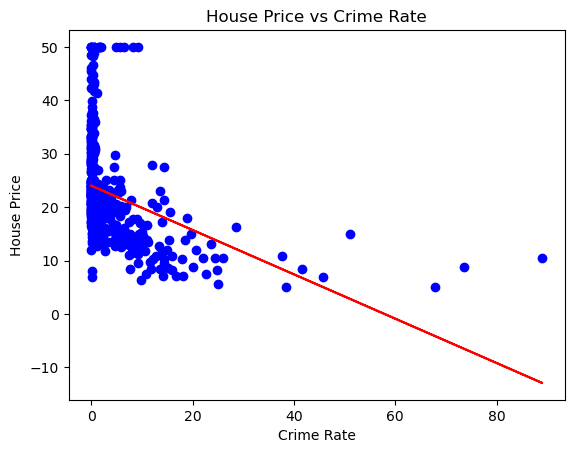

Coefficient: 
 [[-0.41519028]]


In [5]:
# Explore the data with visualisations such as histograms and correlation matrices

# House Price v Crime Rate

# Select and reshape data
x = house_data.iloc[:,0].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Crime Rate')
plt.xlabel('Crime Rate')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)



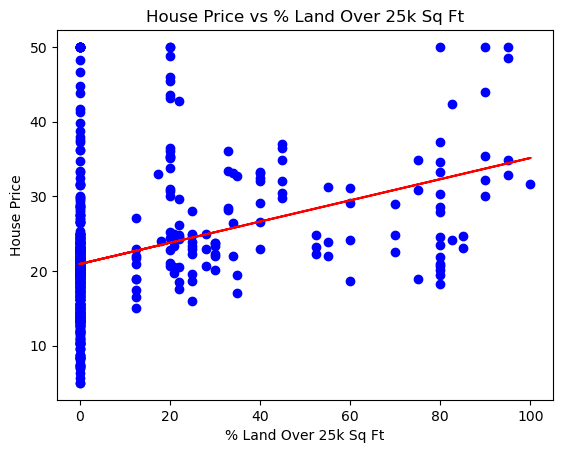

Coefficient: 
 [[0.14213999]]


In [6]:
# House Price v % of Land zoned for lots over 25k sq ft

# Select and reshape data
x = house_data.iloc[:,1].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs % Land Over 25k Sq Ft')
plt.xlabel('% Land Over 25k Sq Ft')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

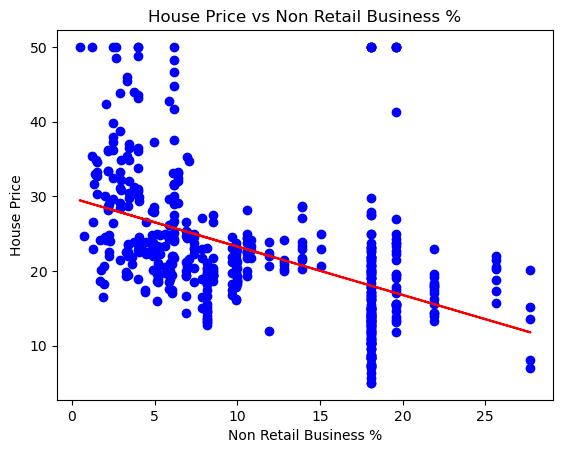

Coefficient: 
 [[-0.64849005]]


In [7]:
# House Price v Non Retail Business %

# Select and reshape data
x = house_data.iloc[:,2].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Non Retail Business %')
plt.xlabel('Non Retail Business %')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

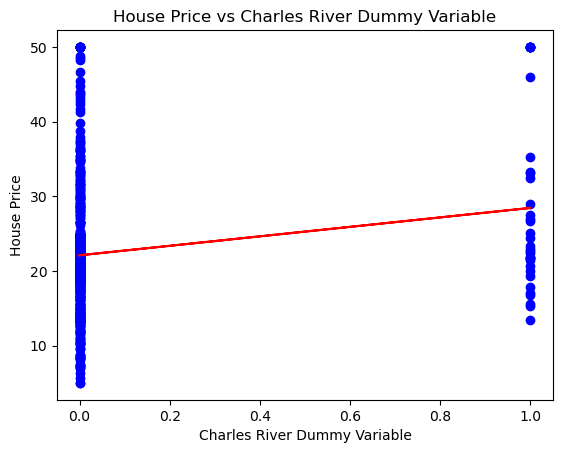

Coefficient: 
 [[6.34615711]]


In [8]:
# House Price v Charles River Dummy Variable

# Select and reshape data
x = house_data.iloc[:,3].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Charles River Dummy Variable')
plt.xlabel('Charles River Dummy Variable')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

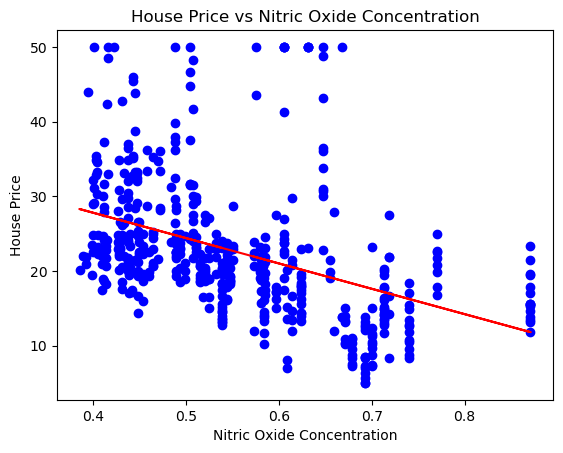

Coefficient: 
 [[-33.91605501]]


In [9]:
# House Price v Nitric Oxide Concentration

# Select and reshape data
x = house_data.iloc[:,4].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Nitric Oxide Concentration')
plt.xlabel('Nitric Oxide Concentration')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

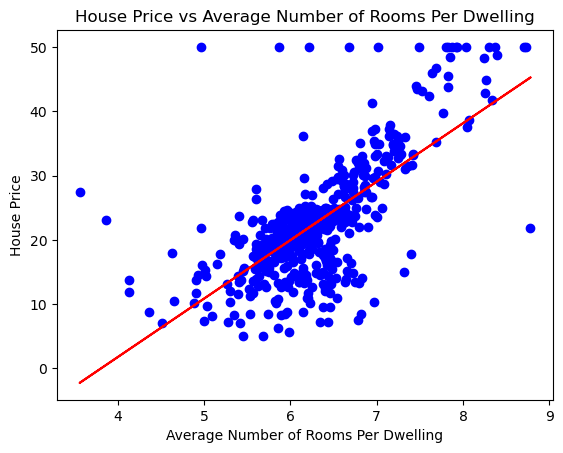

Coefficient: 
 [[9.10210898]]


In [10]:
# House Price v Average Number of Rooms Per Dwelling

# Select and reshape data
x = house_data.iloc[:,5].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Average Number of Rooms Per Dwelling')
plt.xlabel('Average Number of Rooms Per Dwelling')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

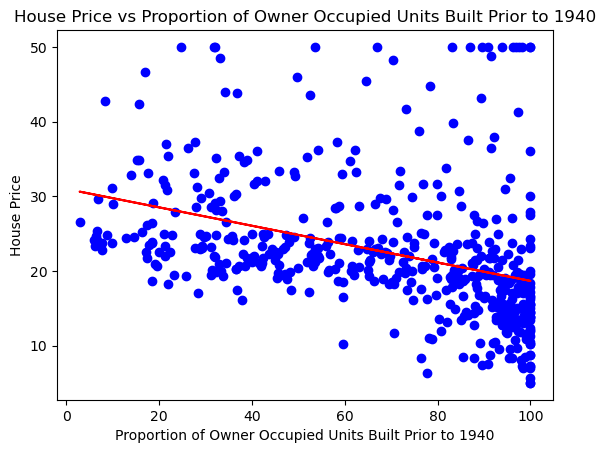

Coefficient: 
 [[-0.12316272]]


In [11]:
# House Price v Proportion of Owner Occupied Units Built Prior to 1940

# Select and reshape data
x = house_data.iloc[:,6].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Proportion of Owner Occupied Units Built Prior to 1940')
plt.xlabel('Proportion of Owner Occupied Units Built Prior to 1940')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

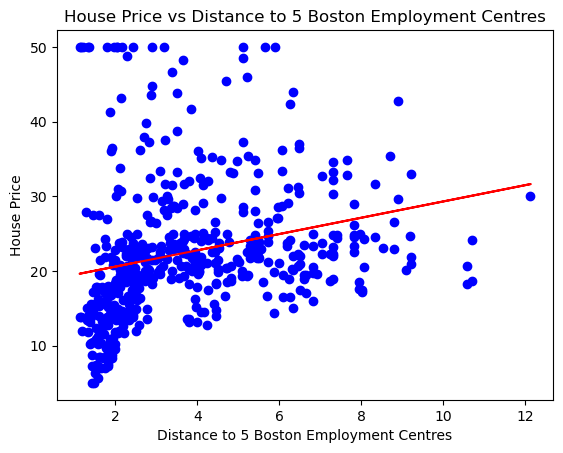

Coefficient: 
 [[1.09161302]]


In [12]:
# House Price v Distance to 5 Boston Employment Centres

# Select and reshape data
x = house_data.iloc[:,7].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Distance to 5 Boston Employment Centres')
plt.xlabel('Distance to 5 Boston Employment Centres')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

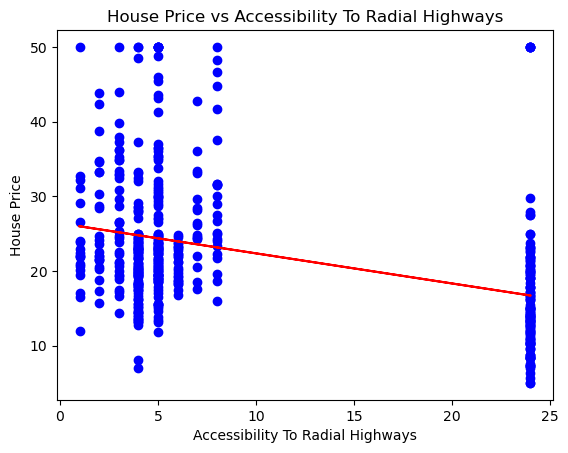

Coefficient: 
 [[-0.4030954]]


In [13]:
# House Price v Accessibility To Radial Highways

# Select and reshape data
x = house_data.iloc[:,8].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Accessibility To Radial Highways')
plt.xlabel('Accessibility To Radial Highways')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

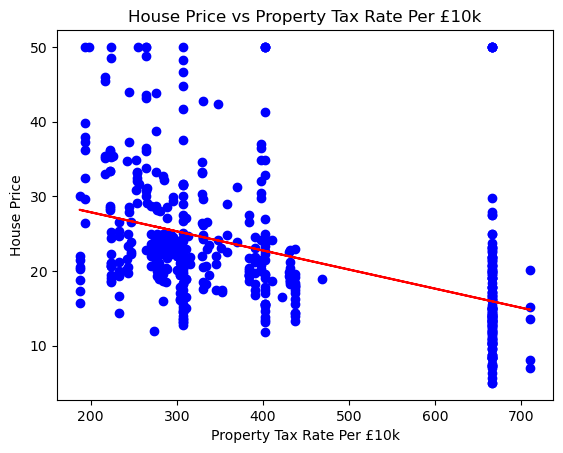

Coefficient: 
 [[-0.0255681]]


In [14]:
# House Price v Property Tax Rate Per £10k

# Select and reshape data
x = house_data.iloc[:,9].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Property Tax Rate Per £10k')
plt.xlabel('Property Tax Rate Per £10k')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

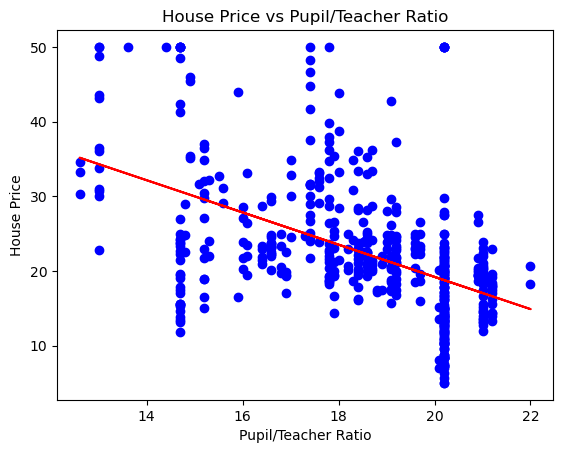

Coefficient: 
 [[-2.1571753]]


In [15]:
# House Price v Pupil/Teacher Ratio

# Select and reshape data
x = house_data.iloc[:,10].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Pupil/Teacher Ratio')
plt.xlabel('Pupil/Teacher Ratio')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

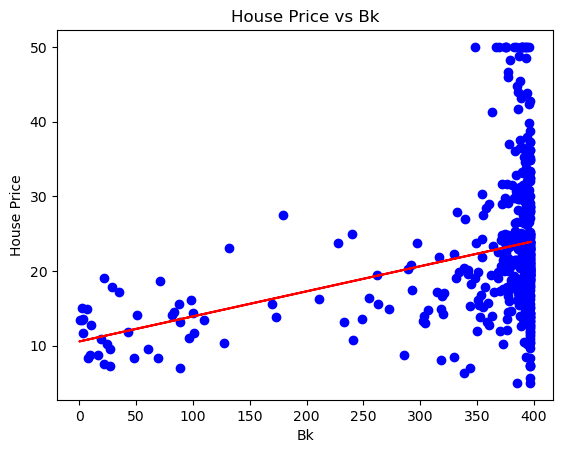

Coefficient: 
 [[0.03359306]]


In [16]:
# House Price v Bk

# Select and reshape data
x = house_data.iloc[:,11].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs Bk')
plt.xlabel('Bk')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

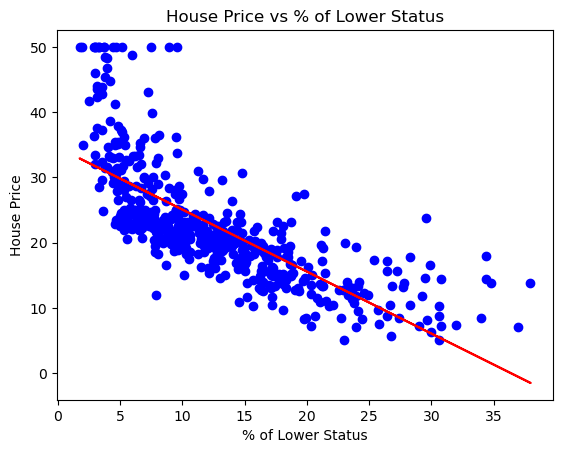

Coefficient: 
 [[-0.95004935]]


In [17]:
# House Price v % of Lower Status

# Select and reshape data
x = house_data.iloc[:,12].values
y = house_data.iloc[:,13].values
y=y.reshape(-1, 1)
x=x.reshape(-1, 1)


# Create an empty linear regression model 
house_model = LinearRegression()

# Create the model using fit(x,y)
house_model.fit(x,y)

# Use model to make a prediction
y_pred = house_model.predict(x)

# Plot model and data
plt.scatter(x,y,color = 'b')
plt.plot(x,house_model.predict(x),color = 'r')
plt.title('House Price vs % of Lower Status')
plt.xlabel('% of Lower Status')
plt.ylabel('House Price')
plt.show()

# Print coefficient
print('Coefficient: \n', house_model.coef_)

c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

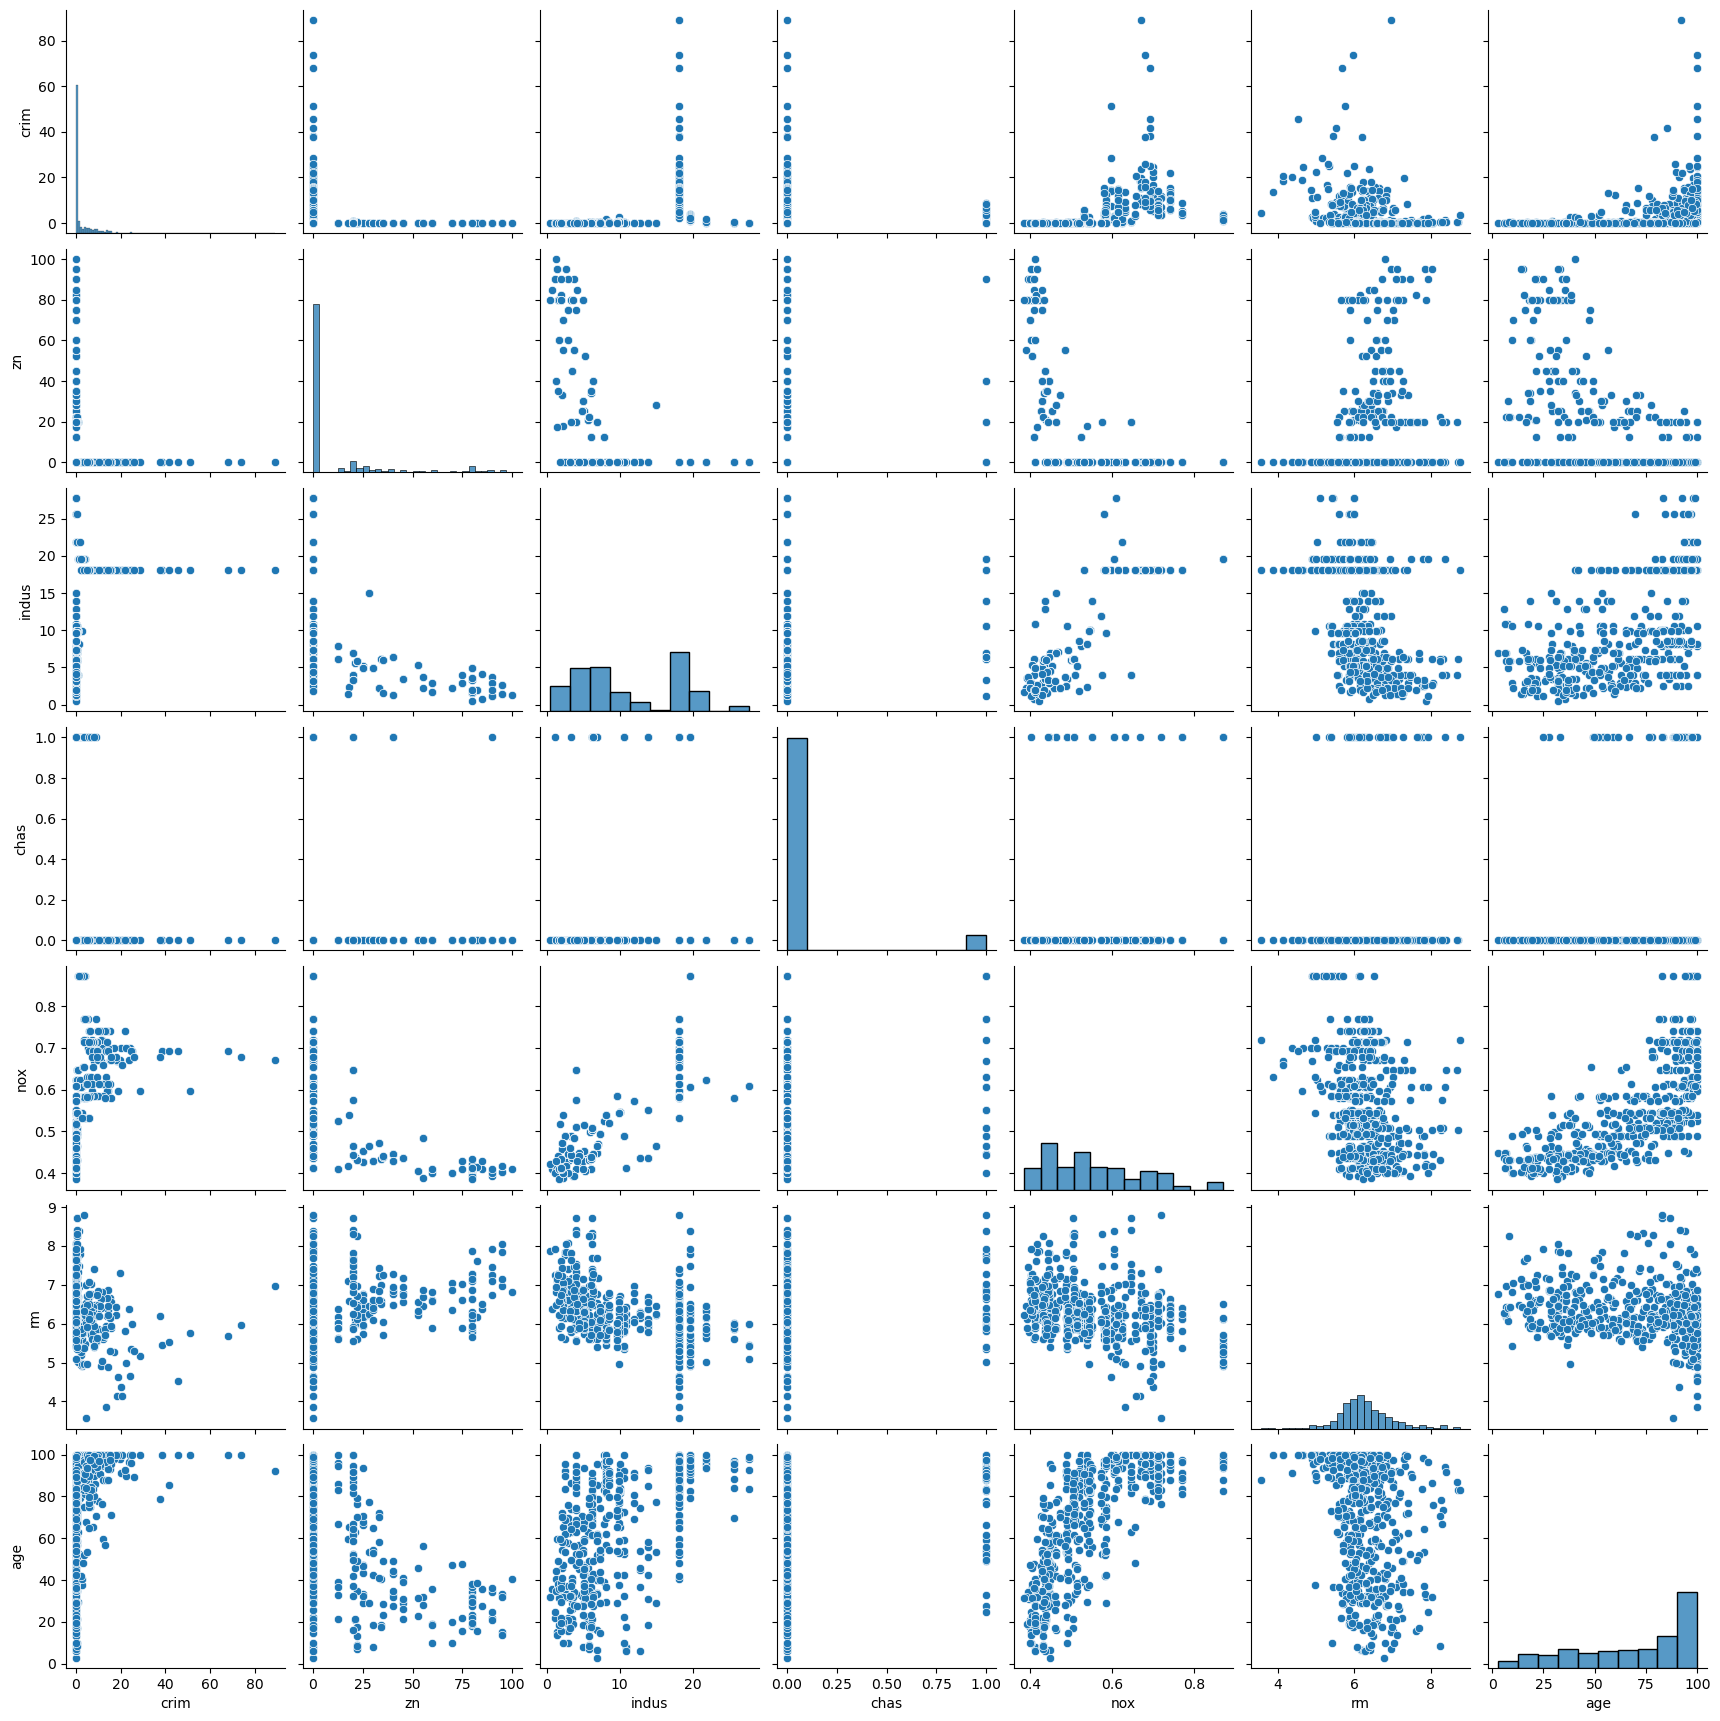

In [18]:
# Look at the histograms.

# As there's so many, split it in to the first half of columns (here) and the second half (next)
# Plot the distribution of the data
sns.pairplot(data=house_data.drop(['dis','rad','tax','ptratio','b','lstat','medv'], axis=1))



c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Martin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

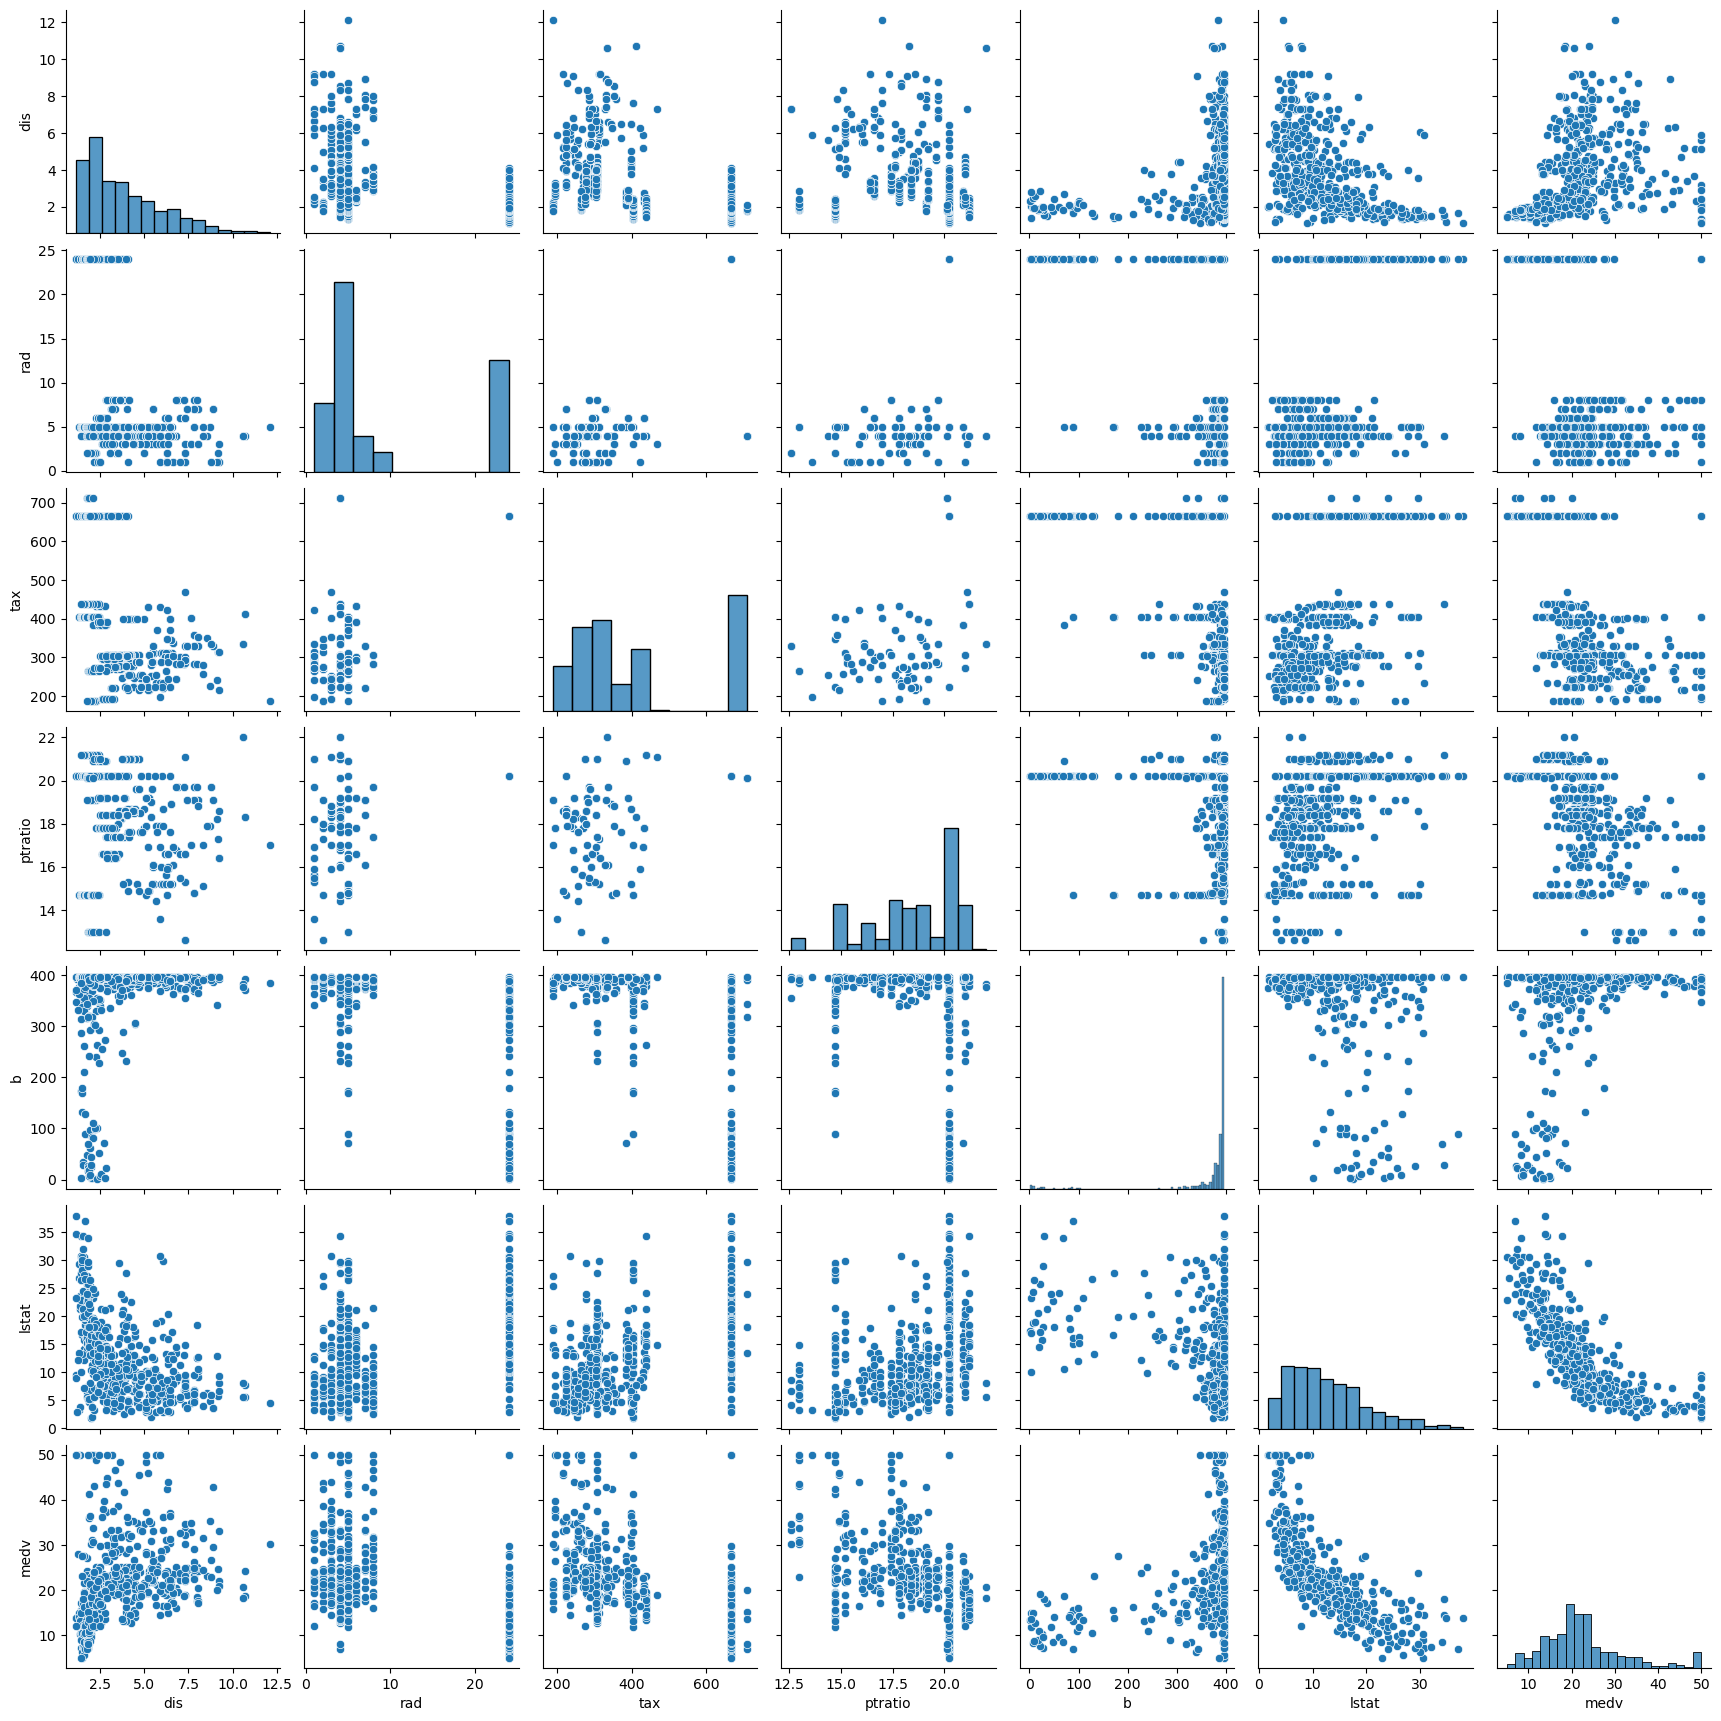

In [19]:
sns.pairplot(data=house_data.drop(['crim','zn','indus','chas','nox','rm','age'], axis=1))



**Patterns and trends in the data.**

The following variables have a positive correlation with median value of homes:
zn, chas, rm, dis, b.

The following variables have a negative correlation with median value of homes:
crim, indus, nox, age, rad, tax, ptratio, lstat.


Looking at the histograms of each independent variable, only the following have Gaussian distribution:
rm.

In [45]:
# Split the independent variables from the dependent variable

# The independent variables to be used are rm (average number of rooms) and lstat (proportion of the 
# population with 'low status'). These are columns 5 & 12.
# The dependent variable will be median value of owner-occupied homes. This is column 13.

X = house_data.iloc[:,[5,12]].values


y = house_data.iloc[:,13].values

y = y.reshape(-1, 1)
X = X.reshape(-1, X.shape[1])


In [55]:
# Explore relationships between the independent and dependent variables


# See the correlation charts above for the individual relationships that rm & lstat have with the 
# dependent variable, medv.

# Create an empty linear regression model
house_model = LinearRegression()

# Create the model using fit(X,y)
house_model.fit(X,y)

# Get intercept and coefficients
print('Intercept: \n', house_model.intercept_)
print('Coefficients: \n', house_model.coef_)

Intercept: 
 [-1.35827281]
Coefficients: 
 [[ 5.09478798 -0.64235833]]


In [58]:
# Create a training and test set with a 75:25 split ratio

# Split data into training and test sets
rseed = 23 # Use the same random seed for learning purposes to get the same result
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,  random_state=rseed)

print ("Training data:",X_train.shape, y_train.shape)
print ("Test data:",X_test.shape, y_test.shape)

Training data: (379, 2) (379, 1)
Test data: (127, 2) (127, 1)


In [108]:
# Build a multiple linear regression model using 'rm' and 'lstat'

# Use MinMaxScalar as lstat doesn't follow Gaussian distribution.
# Fit the scaler on train data
sc = MinMaxScaler()
sc.fit(X_train)

# Apply the scaler on train and test data
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

# Fit a model
lm = LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

# Create line coordinates
X_line = np.empty(X_test.shape)
for i in range(X_test.shape[1]):
    X_line[:, i] = np.linspace(np.min(X_test[:,i]), np.max(X_test[:,i]), num=X_test.shape[0])
y_line = lm.predict(X_line)









In [109]:
# Print the model intercept and coefficients

print('Intercept: \n', lm.intercept_)
print('Coefficients: \n', lm.coef_)



Intercept: 
 [15.62576486]
Coefficients: 
 [[ 24.92074301 -23.23148606]]


In [110]:
# Generate predictions for the test set

predictions[0:10]

array([[22.92283608],
       [26.09586861],
       [23.79496685],
       [18.24503287],
       [39.75785571],
       [19.0827138 ],
       [17.60588655],
       [30.84848553],
       [31.79034742],
       [37.80458986]])

In [111]:
# Evaluate the model

# R squared score
print ("R2 Score:", round (model.score(X_test, y_test), 4))

R2 Score: 0.6279


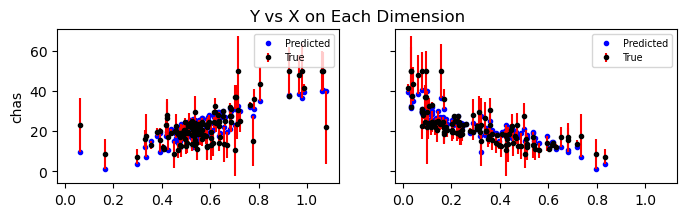

In [112]:
# Generate a plot

## Plot the errors
fig, ax = plt.subplots(1, X_test.shape[1], sharey=True, sharex=True, figsize=(8,2))
fig.suptitle("Y vs X on Each Dimension")
ax[0].set_ylabel(house_data.columns[3])

# Get values for the error bar
error_bar_values = np.abs((y_test-predictions)[:,0])

# Plot data, predicted values, and error bars
for i in range(X_test.shape[1]):
    ax[i].errorbar(X_test[:, i], y_test[:, 0], yerr=error_bar_values, fmt='.k', ecolor='red', label='True')
    ax[i].scatter(X_test[:,i], predictions[:,0], c='b', marker='.', label='Predicted')
    ax[i].legend(loc='best', fontsize='x-small')

In [113]:
# Print the coefficients

print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[ 24.92074301 -23.23148606]]


**Interpret coefficients in the context of the prediction:**
The two coefficents are (almost) equal in size and opposite in direction (# of rooms is postitive, lower status is negative).

**Summarise findings**
The R2 score of 0.6279 suggests that these two variables dont produce a regression line of particularly high prediction accuracy. The closer to 1, the more accurate the predictions tend to be. 

The data from the number of rooms variable (rm) is all clustered fairly close together with a few outliers. Therefore, the further from the cluster the test data is, the less accurate. This looks to be the case on the chart with the longer error lines being the outliers further from the cluster, but much shorter within the cluster. Is this because MinMaxScalar was used (because lstat isn't Gaussianly distributed), but StandardScalar would have better suited rm?

The error lines appear to be bigger for lstat for the lower x-axis values. 